## Paso 1: Importar librerias

In [29]:
#Tratamiento de datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Modelamiento
from sklearn.neural_network import MLPClassifier

# Ajuste de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Validación del modelo
from sklearn.metrics import accuracy_score, f1_score

#Configuración de advertencias
import warnings
warnings.filterwarnings("ignore")

## Paso 2: Cargar los datos

In [30]:
data = pd.read_csv('datos_caso_4.csv', sep=';')

data

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Score
0,Negative,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",Yes,good
1,0 - 200,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),none,...,real estate,22,none,own,1,skilled employee / official,1,none,Yes,bad
2,No checking account,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),none,...,real estate,49,none,own,1,unskilled - resident,2,none,Yes,good
3,Negative,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,Yes,good
4,Negative,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,Yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,less than 100,4 to 7 years,3,female (divorced/separated/married),none,...,real estate,31,none,own,1,unskilled - resident,1,none,Yes,good
996,Negative,30,existing credits paid back duly till now,car (used),3857,less than 100,1 to 4 years,4,male (divorced/separated),none,...,building society savings agreement/ life insur...,40,none,own,1,management / self-employed / highly qualified ...,1,"yes, registered under the customers name",Yes,good
997,No checking account,12,existing credits paid back duly till now,radio/television,804,less than 100,more than 7 years,4,male (single),none,...,car or other,38,none,own,1,skilled employee / official,1,none,Yes,good
998,Negative,45,existing credits paid back duly till now,radio/television,1845,less than 100,1 to 4 years,4,male (single),none,...,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",Yes,bad


## Paso 3: Visualizacion de los datos

El codigo es del profe

### Datos numericos

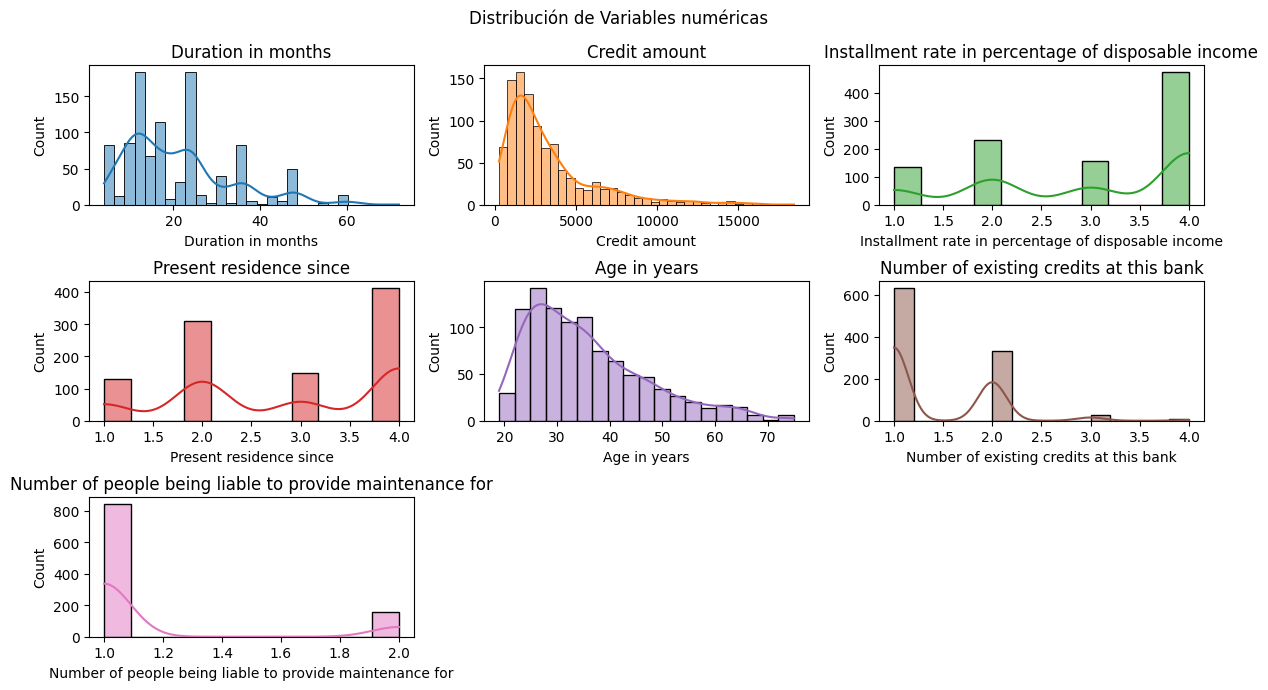

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (12, 7))
axes = axes.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data,
                x = col,
                kde = True,
                color = (list(plt.rcParams['axes.prop_cycle']) * 2)[i]['color'], # *2 para tener + colores
                ax = axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribución de Variables numéricas')
plt.show()

### Datos cualitativos

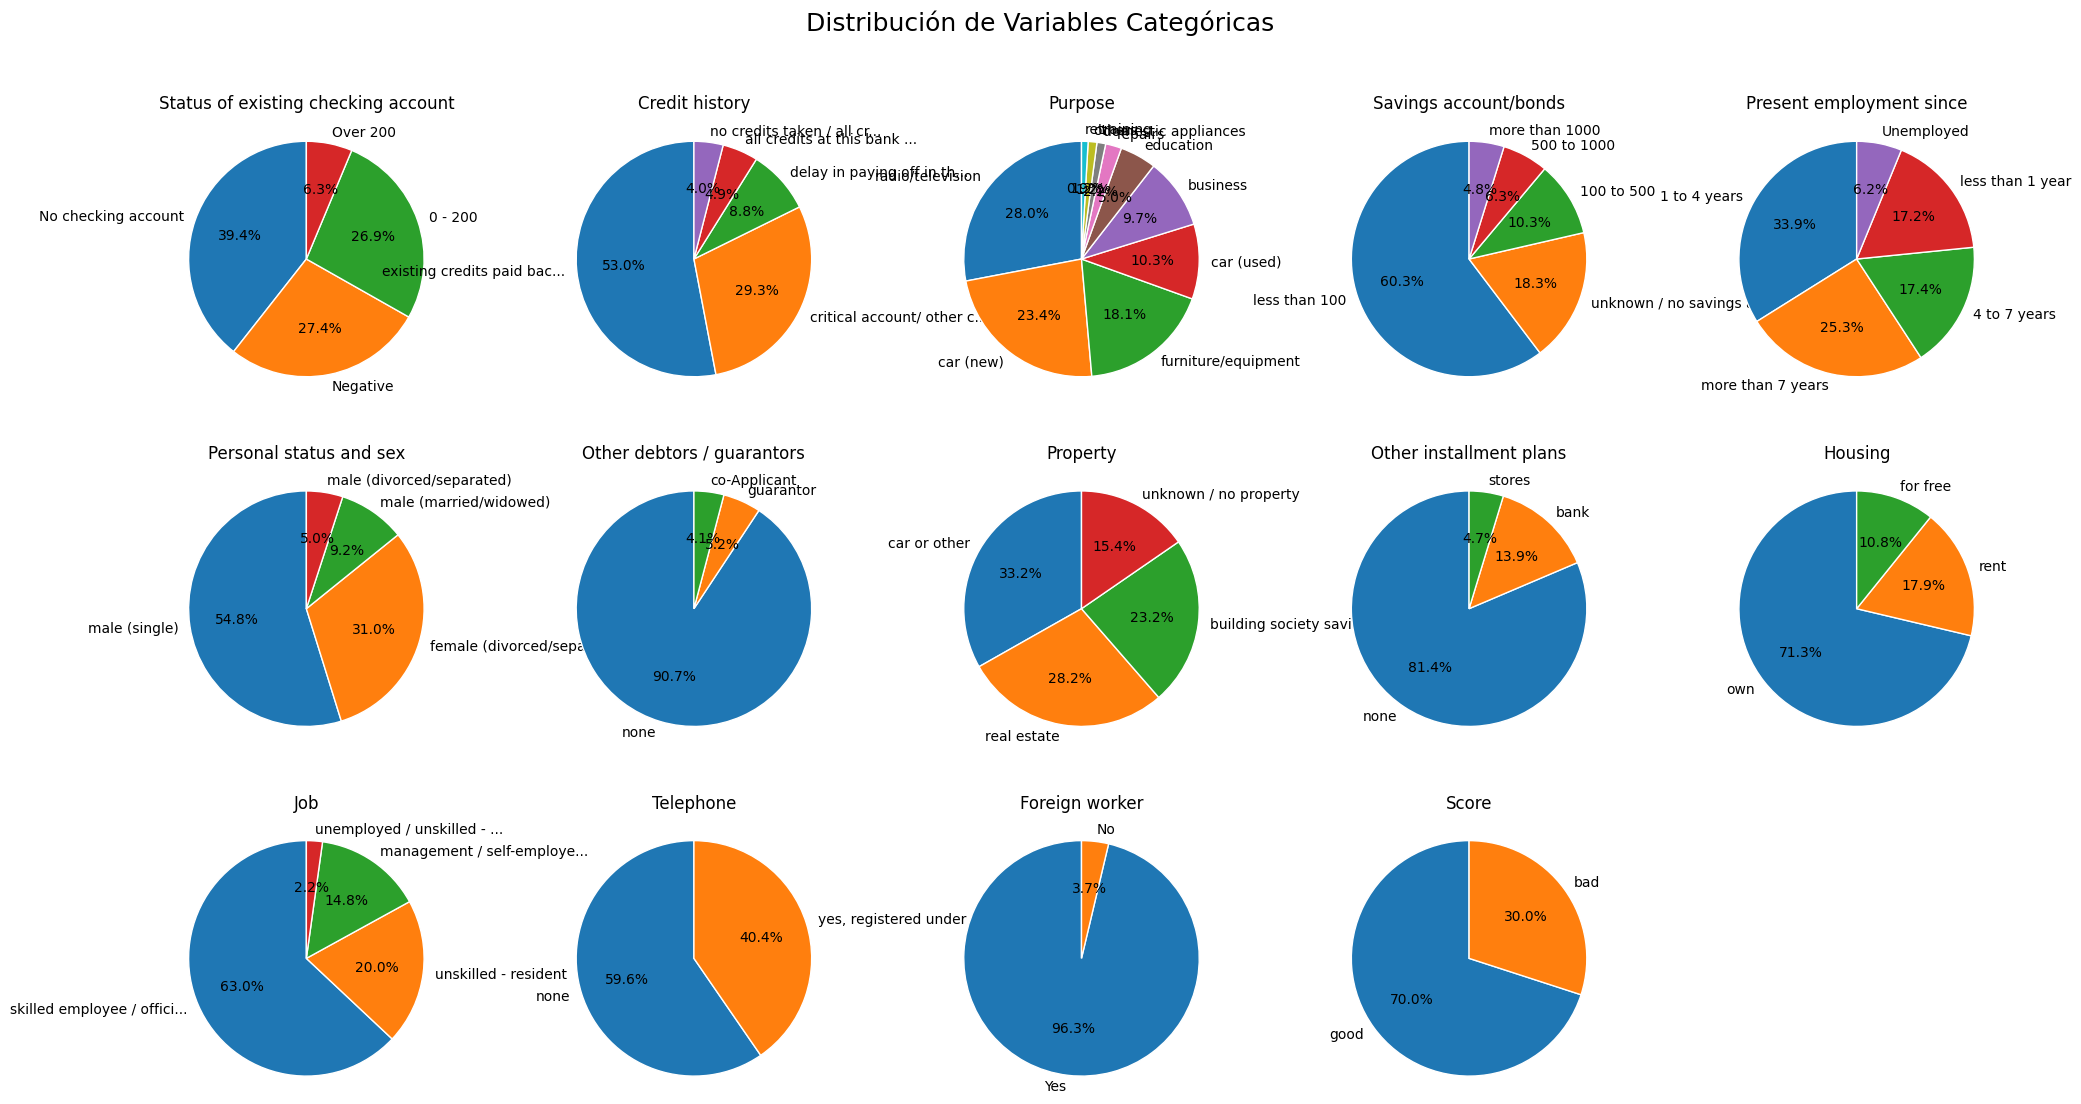

In [33]:
cat_col = data.select_dtypes(include=['object']).columns
 
fig, axes = plt.subplots(3, 5, figsize=(22, 12))  # Aumenta el tamaño de la figura
axes = axes.flatten()
 
for i, col in enumerate(cat_col):
    valores = data[col].value_counts()
    etiquetas = [str(label)[:25] + '...' if len(str(label)) > 25 else str(label) for label in valores.index]  # Etiquetas cortas
    axes[i].pie(
        x=valores,
        labels=etiquetas,
        autopct='%0.1f%%',
        textprops={'fontsize': 10},
        startangle=90,
        wedgeprops={'edgecolor': 'w'}
    )
    axes[i].set_title(col, fontsize=12, pad=15)
    axes[i].axis('equal')  # Hace los círculos perfectamente redondos
 
# Elimina ejes vacíos si hay menos de 15 categorías
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
 
fig.tight_layout(pad=4.0, rect=[0, 0.03, 1, 0.95])  # Más espacio entre subplots y para el título
plt.subplots_adjust(top=0.88, hspace=0.35, wspace=0.25)  # Ajusta espacio entre filas y columnas
plt.suptitle('Distribución de Variables Categóricas', fontsize=18)
plt.show()

## Paso 4: Eliminación de columnas

Los datos contienen demasiadas columnas, por lo cual se hizo un analisis para ver cuales datos **no eran tan relevantes** o que la **data no proporcionaba suficiente informacion** para determinar una corelacion con el caso.

In [ ]:
data_mod = data.drop(['Telephone', 'Foreign worker', 'Number of people being liable to provide maintenance for'], axis = 1)
data_mod

,Status of existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Score
0,Negative,6,critical account/ other credits existing (not ...,radio/television,1169,unknown / no savings account,more than 7 years,4,male (single),none,4,real estate,67,none,own,2,skilled employee / official,good
1,0 - 200,48,existing credits paid back duly till now,radio/television,5951,less than 100,1 to 4 years,2,female (divorced/separated/married),none,2,real estate,22,none,own,1,skilled employee / official,bad
2,No checking account,12,critical account/ other credits existing (not ...,education,2096,less than 100,4 to 7 years,2,male (single),none,3,real estate,49,none,own,1,unskilled - resident,good
3,Negative,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100,4 to 7 years,2,male (single),guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,good
4,Negative,24,delay in paying off in the past,car (new),4870,less than 100,1 to 4 years,3,male (single),none,4,unknown / no property,53,none,for free,2,skilled employee / official,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No checking account,12,existing credits paid back duly till now,furniture/equipment,1736,less than 100,4 to 7 years,3,female (divorced/separated/married),none,4,real estate,31,none,own,1,unskilled - resident,good
996,Negative,30,existing credits paid back duly till now,car (used),3857,less than 100,1 to 4 years,4,male (divorced/separated),none,4,building society savings agreement/ life insur...,40,none,own,1,management / self-employed / highly qualified ...,good
997,No checking account,12,existing credits paid back duly till now,radio/television,804,less than 100,more than 7 years,4,male (single),none,4,car or other,38,none,own,1,skilled employee / official,good
998,Negative,45,existing credits paid back duly till now,radio/television,1845,less than 100,1 to 4 years,4,male (single),none,4,unknown / no property,23,none,for free,1,skilled employee / official,bad


## Paso 5: Separar la data de entre entrenamiento y validacion

- Se separa un 70% de los datos para entrenamiento y el 30% restante en validacion

- Se elimina la columna score de los datos, ya que esto es lo que deseamos predecir

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_mod.drop('Score', axis = 1), data[['Score']], train_size = 0.7)

Permite comparar visualmente cómo se distribuyen los valores de 'Score' en los conjuntos de entrenamiento y validación. Así puedes verificar si ambos conjuntos tienen distribuciones similares, lo cual es importante para asegurar que el modelo se entrene y se valide en datos comparables.

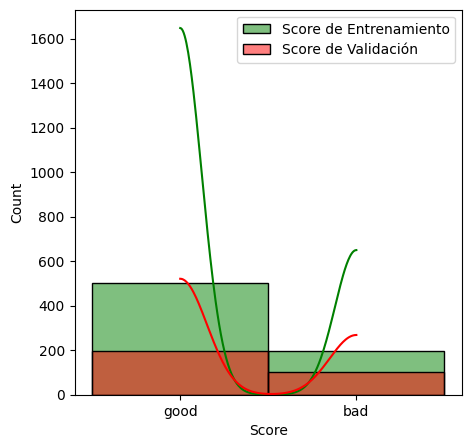

In [17]:
fig, ax = plt.subplots(figsize = (5,5))
sb.histplot(data = y_train, x = 'Score', bins = 15, kde = True, color = 'green', label = 'Score de Entrenamiento')
sb.histplot(data = y_test, x = 'Score', bins = 15, kde = True, color = 'red', label = 'Score de Validación')
plt.legend()
plt.show()

## Paso 6: Transformacion de los datos

Se separan los datos numericos de los categoricos.

- Numéricas: escalar (llevar todas las var numéricas a un mismo rango estadístico)
- Categóricas: codificar (llevar todas las var categóricas a numéricas, **si no las llevo no las puedo usar**)

In [18]:
num_col = X_train.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X_train.select_dtypes(include = ['object']).columns.to_list()

num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers = [
    ('numeric', num_transformer, num_col),
    ('categorical', cat_transformer, cat_col)
], remainder = 'passthrough')

In [19]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Duration in months', 'Credit amount',
                                  'Installment rate in percentage of '
                                  'disposable income',
                                  'Present residence since', 'Age in years',
                                  'Number of existing credits at this bank']),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Status of existing checking account',
                                  'Credit history', 'Purpose',
                                  'Savings account/bonds',
                                  'Present employment since',
                                  'Personal status and sex',
                                  'Other debtors / guarantors', 'Property',
                                  'Other installment plans', 'Housing',
                                  'Job'])])

## Paso 7: Almacenar los datos preprocesados

In [ ]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.fit_transform(X_test)

cod_cat = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])

## Paso 8: Guardar los datos procesador

In [ ]:
X_train_pro = pd.DataFrame (X_train_pre, columns = labels)
X_train_pro

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Status of existing checking account_0 - 200,Status of existing checking account_Negative,Status of existing checking account_No checking account,Status of existing checking account_Over 200,...,Other installment plans_bank,Other installment plans_none,Other installment plans_stores,Housing_for free,Housing_own,Housing_rent,Job_management / self-employed / highly qualified employee / officer,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident
0,0.294118,0.092165,0.333333,0.333333,0.109091,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.117647,0.049961,0.666667,0.000000,0.109091,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.029412,0.057720,0.000000,0.000000,0.981818,0.666667,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.205882,0.098437,0.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.470588,0.117420,1.000000,0.000000,0.236364,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.294118,0.087323,1.000000,1.000000,0.254545,0.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
696,0.294118,0.116045,0.000000,0.000000,0.236364,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
697,0.029412,0.245736,0.000000,0.666667,0.436364,0.333333,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
698,0.294118,0.057060,1.000000,1.000000,0.309091,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
X_test_pro = pd.DataFrame(X_test_pre, columns = labels)
X_test_pro

,Duration in months,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Status of existing checking account_0 - 200,Status of existing checking account_Negative,Status of existing checking account_No checking account,Status of existing checking account_Over 200,...,Other installment plans_bank,Other installment plans_none,Other installment plans_stores,Housing_for free,Housing_own,Housing_rent,Job_management / self-employed / highly qualified employee / officer,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident
0,0.571429,0.737488,1.000000,0.333333,0.125000,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.357143,0.078381,1.000000,0.333333,0.160714,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.142857,0.029298,1.000000,0.333333,0.232143,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.357143,0.113815,0.666667,0.333333,0.250000,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.571429,0.337998,1.000000,0.333333,0.178571,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.357143,0.166000,1.000000,0.333333,0.285714,0.333333,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
296,0.142857,0.046532,1.000000,1.000000,0.142857,1.000000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
297,0.142857,0.149524,0.333333,1.000000,0.125000,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
298,0.732143,0.108162,1.000000,1.000000,0.071429,0.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Paso 9: Creacion de los modelos

In [ ]:
modelos = {
    "modelo_1": MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000),
    "modelo_2": MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000),
    "modelo_3": MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000),
    "modelo_4": MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000),
    "modelo_5": MLPClassifier(hidden_layer_sizes=(32, 32, 32), max_iter=1000),
}

## Paso 10: Entrenamiento y evaluacion de los modelos

**Accuracy:** Porcentaje de aciertos


**F1 Score:** Métrica que combina precisión y recall, útil cuando hay desbalance de clases.
- Precisión (Precision): De todos los casos que el modelo predijo como positivos, ¿cuántos realmente lo eran?
- Recall (Sensibilidad): De todos los casos que realmente eran positivos, ¿cuántos encontró el modelo?
- El F1 Score penaliza los modelos que solo aciertan en la clase mayoritaria y no detectan bien la clase minoritaria.

In [21]:
resultados = []

for nombre, modelo in modelos.items():
    # Se entrena el modelo
    modelo.fit(X_train_pro, y_train)

    # Se evalúa el modelo
    y_pred = modelo.predict(X_test_pro)

    # Se calcula la precisión y el F1 Score
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="good")

    # Se imprime el resultado
    print(f"{nombre} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    # Se guarda el resultado
    resultados.append((nombre, acc, f1))

modelo_1 - Accuracy: 0.7400, F1 Score: 0.8134
modelo_2 - Accuracy: 0.7300, F1 Score: 0.8076
modelo_3 - Accuracy: 0.7133, F1 Score: 0.7962
modelo_4 - Accuracy: 0.7500, F1 Score: 0.8210
modelo_5 - Accuracy: 0.7133, F1 Score: 0.7981


## Paso 11: Obtener el mejor modelo basado en el F1

In [23]:
mejor_modelo = max(resultados, key=lambda x: x[2])
print(f"\n Mejor topología: {mejor_modelo[0]} con Accuracy de {mejor_modelo[1]:.4f} y F1 Score de {mejor_modelo[2]:.4f}")


 Mejor topología: modelo_4 con Accuracy de 0.7500 y F1 Score de 0.8210


Grafica de resultados

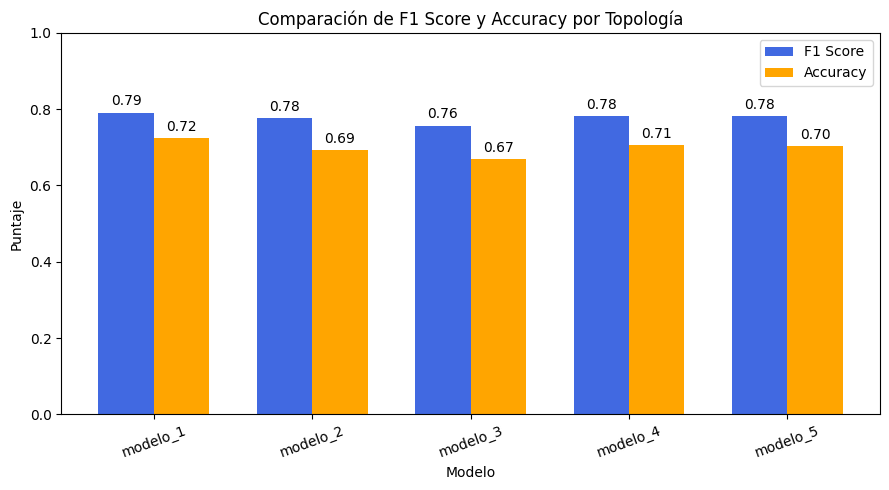

In [35]:
# Extraer nombres, F1 y Accuracy de los resultados
nombres = [x[0] for x in resultados]
f1_scores = [x[1] for x in resultados]
accuracies = [x[2] for x in resultados]
 
x = np.arange(len(nombres))
width = 0.35  # ancho de las barras
 
fig, ax = plt.subplots(figsize=(9, 5))
bars1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='royalblue')
bars2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='orange')
 
# Etiquetas y detalles
ax.set_ylabel('Puntaje')
ax.set_xlabel('Modelo')
ax.set_title('Comparación de F1 Score y Accuracy por Topología')
ax.set_xticks(x)
ax.set_xticklabels(nombres, rotation=20)
ax.set_ylim(0, 1)
ax.legend()
ax.bar_label(bars1, fmt='%.2f', padding=3)
ax.bar_label(bars2, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()

## Paso 12: Despliegue

### Opcion 1: Docker

**Guardar el modelo**

1. Entrena el pipeline (preprocesamiento + modelo) con todos tus datos.
2. Guarda el pipeline entrenado usando joblib.dump(pipeline, 'modelo_entrenado.pkl').
3. Crea un archivo Dockerfile que:
4. Use una imagen base de Python.
5. Copie tu archivo .pkl y tu script de predicción al contenedor.
6. Instale las dependencias necesarias (scikit-learn, pandas, etc).
7. Construye la imagen Docker con docker build -t mi_modelo
8. Subir a la nube a un contenedor

### Opcion 2: REST API

**Subirlo a la nube listo para usar**

1. Entrena el mejor modelo con tus datos finales.
2. Guarda el modelo entrenado usando **joblib.dump** (libreria de python).
3. Crea un pipeline que incluya el preprocesamiento y el modelo.
4. Entrena el pipeline con los datos completos.
5. Guarda el pipeline completo con joblib.dump.
6. Despliega el pipeline en una API (por ejemplo, usando FastAPI) para que pueda recibir datos y devolver predicciones.
7. Subir a la nube a un appService o a un contenedor si se usa docker